P13 Python コード 2.1 pybayes_beta-prior.py
ベルヌーイ分布の成功確率の事前分布の写経

★事前に google colab に登録しておき、google drive の Colab Notebooks フォルダの下に pybayes というフォルダを作っておくこと。

In [1]:
# google colab のディストリビューションを確認しておく。Ubuntu のはず。
!cat /etc/os-release

NAME="Ubuntu"
VERSION="18.04.3 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.3 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic


In [2]:
# google colab には標準で日本語フォントがインストールされないので、日本語フォントをインストールしておく
!sudo apt install fonts-takao

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-takao-gothic fonts-takao-mincho fonts-takao-pgothic
The following NEW packages will be installed:
  fonts-takao fonts-takao-gothic fonts-takao-mincho fonts-takao-pgothic
0 upgraded, 4 newly installed, 0 to remove and 25 not upgraded.
Need to get 11.6 MB of archives.
After this operation, 28.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-takao-pgothic all 00303.01-2ubuntu1 [3,400 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-takao-gothic all 00303.01-2ubuntu1 [3,414 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-takao-mincho all 00303.01-2ubuntu1 [4,736 kB]
Get:4 http://archive.ubuntu

In [5]:
# 日本語フォントの確認。
!ls /usr/share/fonts/truetype/
# TakaoPGothic.ttf の有無を確認。
!ls /usr/share/fonts/truetype/takao-gothic/

font-awesome		   fonts-japanese-mincho.ttf  takao-gothic
fonts-japanese-gothic.ttf  liberation		      takao-mincho
TakaoGothic.ttf  TakaoPGothic.ttf


In [6]:
# Google Driveにマウント
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [7]:
# pybayes フォルダへ移動。
cd /content/gdrive/My Drive/Colab Notebooks/pybayes

/content/gdrive/My Drive/Colab Notebooks/pybayes


In [8]:
# pybayes フォルダにいることを確認。
!ls

2.1_pybayes_beta_prior.ipynb	     pybayes_fig_beta_distribution.png
2.2_pybayes_beta_distribution.ipynb  pybayes_fig_beta_prior.png


In [0]:
# -*- coding: utf-8 -*-

import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [0]:
# 日本語フォントの設定

from matplotlib.font_manager import FontProperties
import sys
if sys.platform.startswith('win'):
  FontPath = 'C:\\Windows\\Fonts\\meiryo.ttc'
elif sys.platform.startswith('darwin'):
  FontPath = '/System/Library/Fonts/ヒラギノ角ゴシック W4.ttc'
elif sys.platform.startswith('linux'):
  FontPath = '/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf'
else:
  print('この Python コードが対応していない OS を使用しています。')
  sys.exit()

jpfont = FontProperties(fname=FontPath)

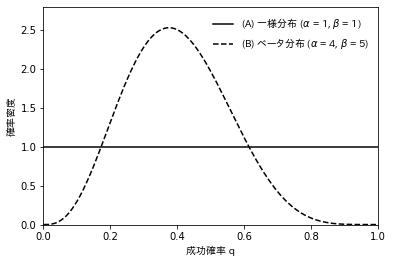

In [15]:
# ベルヌーイ分布の成功確率 q の事前分布

fig1 = plt.figure(num=1, facecolor='w')
# コメント：変数 fig1 は何に使われる？


# 成功確率 q を 0 〜 1 の間の 250 等分されたグリッドとして与える。
q = np.linspace(0, 1, 250)
#print("q =", q)

# グラフのプロット
# plt.plot(x, y, option) x:横座標の NumPy配列 y:縦座標の NumPy配列
plt.plot(q, st.uniform.pdf(q), 'k-')
plt.plot(q, st.beta.pdf(q, 4, 6), 'k--')

# 横軸と縦軸の範囲の指定
plt.xlim(0, 1)
plt.ylim(0, 2.8)

# 凡例
plt.legend(['(A) 一様分布 ($\\alpha$ = 1, $\\beta$ = 1)',
            '(B) ベータ分布 ($\\alpha$ = 4, $\\beta$ = 5)'], 
           loc='best', frameon=False, prop=jpfont)

# 縦軸と横軸のラベル
plt.xlabel('成功確率 q', fontproperties=jpfont)
plt.ylabel('確率密度', fontproperties=jpfont)

# 画像をファイルに保存
plt.savefig('pybayes_fig_beta_prior.png', dpi=300)

# 画像の表示
plt.show()

In [16]:
# 画像ファイル pybayes_fig_beta_prior.png が保存されていることを確認。
!ls

2.1_pybayes_beta_prior.ipynb	     pybayes_fig_beta_distribution.png
2.2_pybayes_beta_distribution.ipynb  pybayes_fig_beta_prior.png
